# 목표설정
- 키와 몸무게 데이터를 가지고 비만도를 측정해보자.
- 머신러닝의 7단계 과정을 하나하나 살펴보자.

###  데이터 불러오기(수집 단계)
- bmi_500.csv파일을 읽어 오자!

In [2]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
bmi=pd.read_csv('./data/bmi_500.csv')
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [6]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [7]:
# 기술 통계 확인하기
# describe()
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [8]:
# label의 고유값을 확인해보자
# unique() : 데이터의 고유값을 확인할 때 사용
bmi.loc[:,'Label'].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

In [9]:
# 각 정답별 갯수 확인
bmi.loc[:,'Label'].value_counts()

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Label, dtype: int64

In [10]:
# 데이터 프레임 확인
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [11]:
# 문제와 정답 추출
X = bmi.iloc[:,1:3]
y = bmi.iloc[:,3]

In [12]:
X.shape, y.shape

((500, 2), (500,))

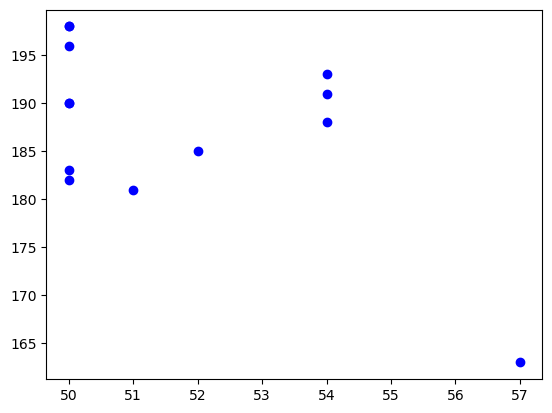

In [18]:
# 전체 데이터의 분포를 살펴보기
data = bmi.set_index("Label")
d = data.loc['Extremely Weak']


# scatter차트그리기 ->산점도 그리기
plt.scatter(d['Weight'], d['Height'], c = 'blue', label = 'Exe Weak')
plt.show()

In [22]:
# 위의 코드를 함수로 만들어주기
def myScatter(label, color):
    d = data.loc[label]
    
    plt.scatter(d['Weight'], d['Height'], c = color, label = label)

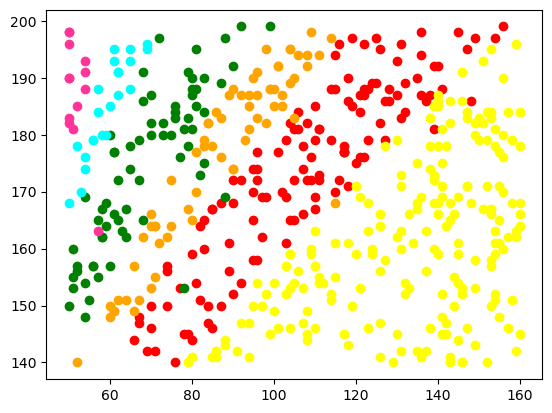

In [24]:
#'Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak','Extremely Weak'], dtype=object
myScatter('Obesity','red')
myScatter('Normal','green')
myScatter('Overweight','orange')
myScatter('Extreme Obesity','yellow')
myScatter('Weak','cyan')
myScatter('Extremely Weak','#ff3399')
plt.show()

# 훈련 평가 데이터 분할

In [26]:
X

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
...,...,...
495,150,153
496,184,121
497,141,136
498,150,95


In [28]:
y

0              Obesity
1               Normal
2              Obesity
3           Overweight
4           Overweight
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 500, dtype: object

In [30]:
# 훈련데이터 350개, 평가 데이터 150개
X_train = X.iloc[:350, :] 
X_test = X.iloc[350:, :]
y_train = y[:350]
y_test = y[350:]

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 2), (150, 2), (350,), (150,))

### 모델링

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
# 모델 객체 생성
knn_bmi01 = KNeighborsClassifier()

In [37]:
# 모델 학습
knn_bmi01.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
# 모델 에측
pre = knn_bmi01.predict(X_test)
pre

array(['Overweight', 'Normal', 'Normal', 'Extreme Obesity',
       'Extremely Weak', 'Obesity', 'Obesity', 'Extreme Obesity', 'Weak',
       'Extreme Obesity', 'Weak', 'Extreme Obesity', 'Extreme Obesity',
       'Obesity', 'Extreme Obesity', 'Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Normal', 'Normal',
       'Normal', 'Normal', 'Overweight', 'Extreme Obesity', 'Overweight',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Obesity', 'Normal', 'Obesity', 'Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme

In [39]:
# 모델 평가
knn_bmi01.score(X_test, y_test)

0.9066666666666666

### 하이퍼 파라미터 수정하기

In [48]:
# 모델 객체 생성
knn_bmi02 = KNeighborsClassifier(n_neighbors=2)

In [49]:
# 모델학습
knn_bmi02.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [50]:
# 모델 예측
pre = knn_bmi02.predict(X_test)
pre

array(['Normal', 'Normal', 'Normal', 'Extreme Obesity', 'Extremely Weak',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Weak', 'Extreme Obesity', 'Extreme Obesity',
       'Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Overweight',
       'Obesity', 'Extreme Obesity', 'Obesity', 'Overweight',
       'Extreme Obesity', 'Weak', 'Normal', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Obesity', 'Overweight',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Weak', 'Extreme Obesity', 'Obesity',
       'Overweight', 'Normal', 'Normal', 'Normal', 'Normal', 'Overweight',
       'Extreme Obesity', 'Overweight', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Obesity', 'Normal',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Obesity', 'Extreme Obesity', 'E

In [51]:
knn_bmi02.score(X_test,y_test)

0.8933333333333333